## Imports

In [2]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import pandas as pd
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
#mpl.rc('axes', labelsize=14)
#mpl.rc('xtick', labelsize=12)
#mpl.rc('ytick', labelsize=12)

## Learning curves functions from scikit learn

In [3]:
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html

from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    axes : array of 3 axes, optional (default=None)
        Axes to use for plotting the curves.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    return plt


def plot_learning_curves(sd_classifier, sd_X_train, sd_y_train):
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))

    title = "Learning Curves for " + sd_classifier.__class__.__name__
    cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

    plot_learning_curve(sd_classifier, title, sd_X_train, sd_y_train, axes=axes, ylim=(0.7, 1.01),
                        cv=cv, n_jobs=4)

    plt.show()

## OpenML SpeedDating dataset
Binary classification: match / no match

In [4]:
from sklearn.datasets import fetch_openml

def sd_download_dataset():
    sd_dataset = fetch_openml('speeddating', version=1)
    return sd_dataset

sd_dataset = sd_download_dataset()
#sd_dataset["feature_names"]

## Kaggle Fashion MNIST dataset
Multiclass classification: 
0 T-shirt/top
1 Trouser
2 Pullover
3 Dress
4 Coat
5 Sandal
6 Shirt
7 Sneaker
8 Bag
9 Ankle boot

In [6]:
def fm_download_dataset():
    train_df = pd.read_csv("./data/fashion-mnist_train.csv")
    test_df = pd.read_csv("./data/fashion-mnist_train.csv")
    return train_df, test_df

fm_train_df, fm_test_df = fm_download_dataset()
fm_train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Convert to DataFrame

In [ ]:
def sd_dataframe(sd_dataset):
    X, y = sd_dataset["data"], sd_dataset["target"]
    vals = {}
    for i, name in enumerate(sd_dataset["feature_names"]):
        vals[name] = X[:, i]
    sd = pd.DataFrame(vals)
    sd["target"] = pd.to_numeric(y)
    return sd

sd_dataset = sd_download_dataset()
sd_df = sd_dataframe(sd_dataset)
sd_df.shape

In [ ]:
# fm already dataframe

## Clean Data

In [ ]:
def sd_clean_data(df):
    selected_cols = [
        "gender",
        "d_age",
        "interests_correlate",
        "like", "d_like",
        "attractive", "attractive_o",
        "met",
        "d_pref_o_shared_interests",
        "d_shared_interests_o", 
        "d_shared_interests_important", 
        "d_shared_interests_partner",
        "target"
    ]

    selected = df[selected_cols]
    clean = selected.dropna()
    return clean

sd_dataset = sd_download_dataset()
sd_df = sd_dataframe(sd_dataset)
sd_clean = sd_clean_data(sd_df)
sd_clean.shape

In [ ]:
# fm already clean

## Create test set

In [ ]:
# Is target balanced? NO
## TODO!

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
def sd_split_test(data):
    features = data.drop("target", axis=1)
    labels = data["target"]

    X_train, X_test, y_train, y_test = train_test_split(
        features, 
        labels, 
        test_size=0.2, 
        random_state=42,
        stratify=features["gender"])
    
    return X_train, X_test, y_train, y_test

In [ ]:
# fm already split in train and test

# Data pipelines

In [ ]:
sd_dataset = sd_download_dataset()

def sd_base_pipeline():
    sd_df = sd_dataframe(sd_dataset)
    sd_clean = sd_clean_data(sd_df)
    sd_X_train, sd_X_test, sd_y_train, sd_y_test = sd_split_test(sd_clean)
    return sd_X_train, sd_X_test, sd_y_train, sd_y_test


sd_X_train, sd_X_test, sd_y_train, sd_y_test = sd_base_pipeline()
assert sd_X_train.shape[0] == sd_y_train.shape[0]
sd_X_train.shape

In [9]:
fm_train_df, fm_test_df = fm_download_dataset()

def fm_base_pipeline():
    fm_X_train = fm_train_df.drop("label", axis=1)
    fm_X_test = fm_test_df.drop("label", axis=1)
    fm_y_train = fm_train_df["label"]
    fm_y_test = fm_test_df["label"]
    return fm_X_train, fm_X_test, fm_y_train, fm_y_test

fm_X_train, fm_X_test, fm_y_train, fm_y_test = fm_base_pipeline()
assert fm_X_train.shape[0] == fm_y_train.shape[0]
fm_X_train.shape

(60000, 784)

# kNN
*You should "implement" (the quotes mean I don't mean it: steal the code) kNN. Use different values of k.*

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [38]:
## Speed Dating

sd_knn = KNeighborsClassifier(n_neighbors=10)
#sd_knn.fit(sd_X_train, sd_y_train)

sd_X_train, sd_X_test, sd_y_train, sd_y_test = sd_base_pipeline()

cross_val_score(sd_knn, sd_X_train, sd_y_train, cv=5, scoring="accuracy").mean()

0.8455678866031976

In [ ]:
## Fashion MNIST

fm_knn = KNeighborsClassifier()
#fm_knn.fit(sd_X_train, sd_y_train)

fm_X_train, fm_X_test, fm_y_train, fm_y_test = fm_base_pipeline()

cross_val_score(fm_knn, fm_X_train, fm_y_train, cv=5, scoring="accuracy").mean()

### Learning curves

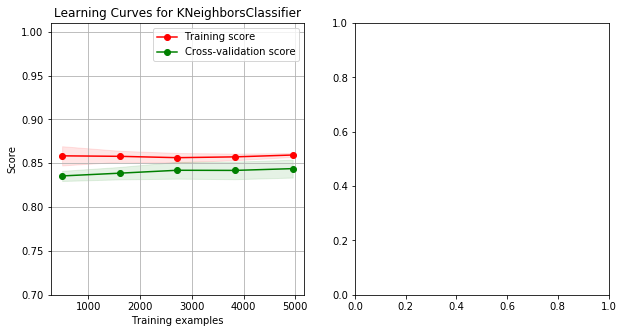

In [13]:
plot_learning_curves(sd_knn, sd_X_train, sd_y_train)

# Random Forest
*For the decision tree, you should implement or steal a decision tree algorithm (and by "implement or steal" I mean "steal"). Be sure to use some form of pruning. You are not required to use information gain (for example, there is something called the GINI index that is sometimes used) to split attributes, but you should describe whatever it is that you do use.*

In [14]:
from sklearn.ensemble import RandomForestClassifier

In [15]:
sd_random_forest = RandomForestClassifier()
#sd_random_forest.fit(sd_X_train, sd_y_train)

sd_X_train, sd_X_test, sd_y_train, sd_y_test = sd_base_pipeline()

cross_val_score(sd_random_forest, sd_X_train, sd_y_train, cv=5, scoring="accuracy").mean()

0.8426569657774184

### Learning curves

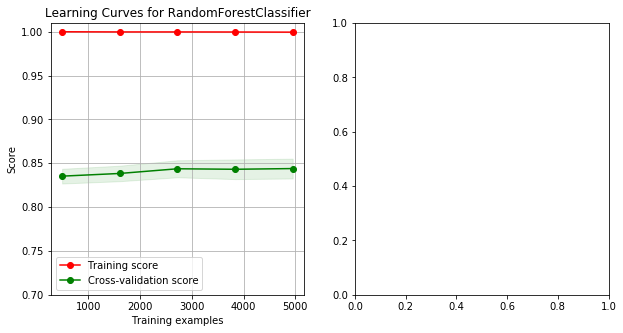

In [16]:
plot_learning_curves(sd_random_forest, sd_X_train, sd_y_train)

## Support Vector Machines
*You should implement (for sufficiently loose definitions of implement including "download") SVMs. This should be done in such a way that you can swap out kernel functions. I'd like to see at least two.*

In [17]:
from sklearn import svm

In [18]:
sd_svc = svm.SVC()
#sd_svc.fit(sd_X_train, sd_y_train)

sd_X_train, sd_X_test, sd_y_train, sd_y_test = sd_base_pipeline()

cross_val_score(sd_svc, sd_X_train, sd_y_train, cv=5, scoring="accuracy").mean()

0.8336028024791162

### Learning curves

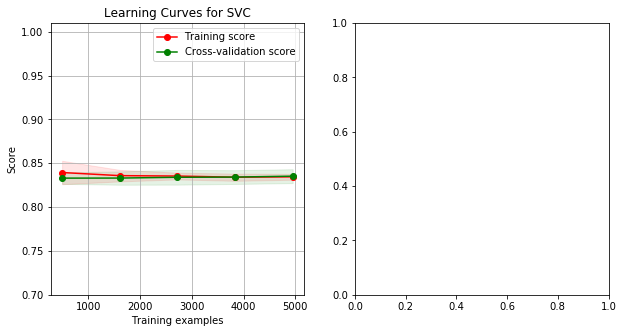

In [19]:
plot_learning_curves(sd_svc, sd_X_train, sd_y_train)

## Boosting
*Implement or steal a boosted version of your decision trees. As before, you will want to use some form of pruning, but presumably because you're using boosting you can afford to be much more aggressive about your pruning.*

In [20]:
from sklearn.ensemble import AdaBoostClassifier

In [21]:
sd_adaboost = AdaBoostClassifier()
#adaboost.fit(sd_X_train, sd_y_train)

sd_X_train, sd_X_test, sd_y_train, sd_y_test = sd_base_pipeline()

cross_val_score(sd_adaboost, sd_X_train, sd_y_train, cv=5, scoring="accuracy").mean()

0.8463768172816056

### Learning curves

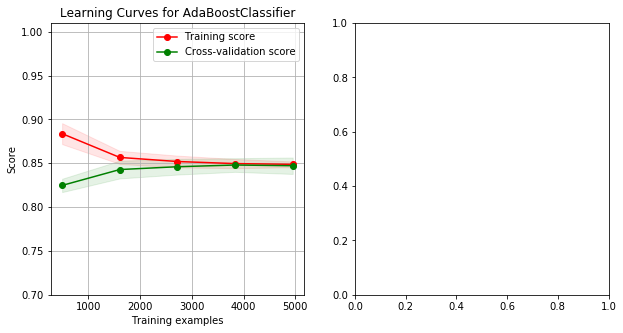

In [22]:
plot_learning_curves(sd_adaboost, sd_X_train, sd_y_train)

## Neural Network
*For the neural network you should implement or steal your favorite kind of network and training algorithm. You may use networks of nodes with as many layers as you like and any activation function you see fit.*

In [23]:
from sklearn.neural_network import MLPClassifier

In [24]:
sd_mlp = MLPClassifier(max_iter=500)
#mlp.fit(sd_X_train, sd_y_train)

sd_X_train, sd_X_test, sd_y_train, sd_y_test = sd_base_pipeline()

cross_val_score(sd_mlp, sd_X_train, sd_y_train, cv=5, scoring="accuracy").mean()

0.8431426642911521

### Learning curves

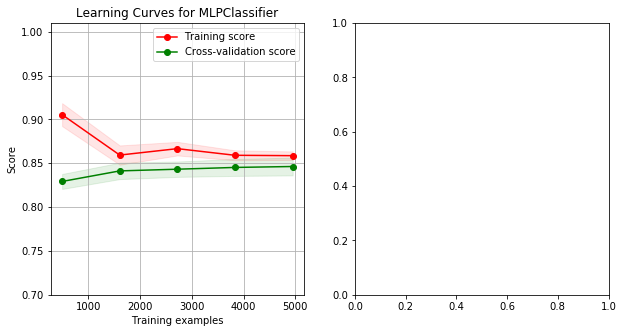

In [25]:
plot_learning_curves(sd_mlp, sd_X_train, sd_y_train)